<a href="https://colab.research.google.com/github/praveen61204/HCLTECH/blob/master/assignment/paper1/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import os
from glob import glob
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Parameters
# -------------------------------
input_folder = "industrial_images"  # folder containing original images
output_folder = "simulated_dataset"
os.makedirs(output_folder, exist_ok=True)

# Lighting settings: (brightness, contrast)
lighting_conditions = {
    "bright": (50, 1.2),
    "dim": (-50, 0.8),
    "uneven": None  # will use custom mask
}

# Lens settings: (focal_scale, blur)
lens_conditions = {
    "normal": (1.0, 0),
    "zoom_in": (1.1, 0),
    "zoom_out": (0.9, 0),
    "blur": (1.0, 5)
}

# -------------------------------
# 2️⃣ Helper functions
# -------------------------------

def adjust_lighting(img, brightness=0, contrast=1.0):
    """Adjust brightness and contrast"""
    img = np.clip(contrast * img + brightness, 0, 255).astype(np.uint8)
    return img

def uneven_lighting(img):
    """Simulate uneven illumination using a circular gradient"""
    h, w = img.shape[:2]
    Y, X = np.ogrid[:h, :w]
    center_x, center_y = w / 2, h / 2
    distance = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
    max_dist = np.sqrt(center_x**2 + center_y**2)
    mask = 0.5 + 0.5 * (distance / max_dist)  # values between 0.5–1.0
    if len(img.shape) == 3:
        mask = mask[:, :, np.newaxis]
    return np.clip(img * mask, 0, 255).astype(np.uint8)

def simulate_lens(img, focal_scale=1.0, blur=0):
    """Simulate focal length changes and blur (aperture/exposure)"""
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, 0, focal_scale)
    img_scaled = cv2.warpAffine(img, M, (w, h))
    if blur > 0:
        img_scaled = cv2.GaussianBlur(img_scaled, (blur, blur), 0)
    return img_scaled

# -------------------------------
# 3️⃣ Process images
# -------------------------------
image_paths = glob(os.path.join(input_folder, "*.jpg")) + glob(os.path.join(input_folder, "*.png"))

for img_path in image_paths:
    img_name = os.path.splitext(os.path.basename(img_path))[0]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to RGB

    # Apply lighting conditions
    for light_name, params in lighting_conditions.items():
        if light_name == "uneven":
            img_lit = uneven_lighting(img)
        else:
            brightness, contrast = params
            img_lit = adjust_lighting(img, brightness, contrast)

        # Apply lens conditions
        for lens_name, (focal_scale, blur) in lens_conditions.items():
            img_final = simulate_lens(img_lit, focal_scale, blur)

            # Save simulated image
            out_dir = os.path.join(output_folder, f"{img_name}_{light_name}_{lens_name}")
            os.makedirs(out_dir, exist_ok=True)
            out_path = os.path.join(out_dir, f"{img_name}.png")
            cv2.imwrite(out_path, cv2.cvtColor(img_final, cv2.COLOR_RGB2BGR))

print(f"✅ Simulation complete! Images saved in: {output_folder}")

# -------------------------------
# 4️⃣ Visualize all variations of one original image
# -------------------------------
original_image_name = "image1"  # replace with your original image name

# Find all folders for this image
image_folders = glob(os.path.join(output_folder, f"{original_image_name}_*"))

# Store images and titles
images = []
titles = []

for folder in image_folders:
    img_files = glob(os.path.join(folder, "*.png"))
    if len(img_files) > 0:
        img_path = img_files[0]
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR → RGB
        images.append(img)
        titles.append(os.path.basename(folder))  # folder name as title

# Display images in a grid
num_images = len(images)
cols = 3
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(5 * cols, 5 * rows))

for i, img in enumerate(images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


✅ Simulation complete! Images saved in: simulated_dataset


<Figure size 1500x0 with 0 Axes>

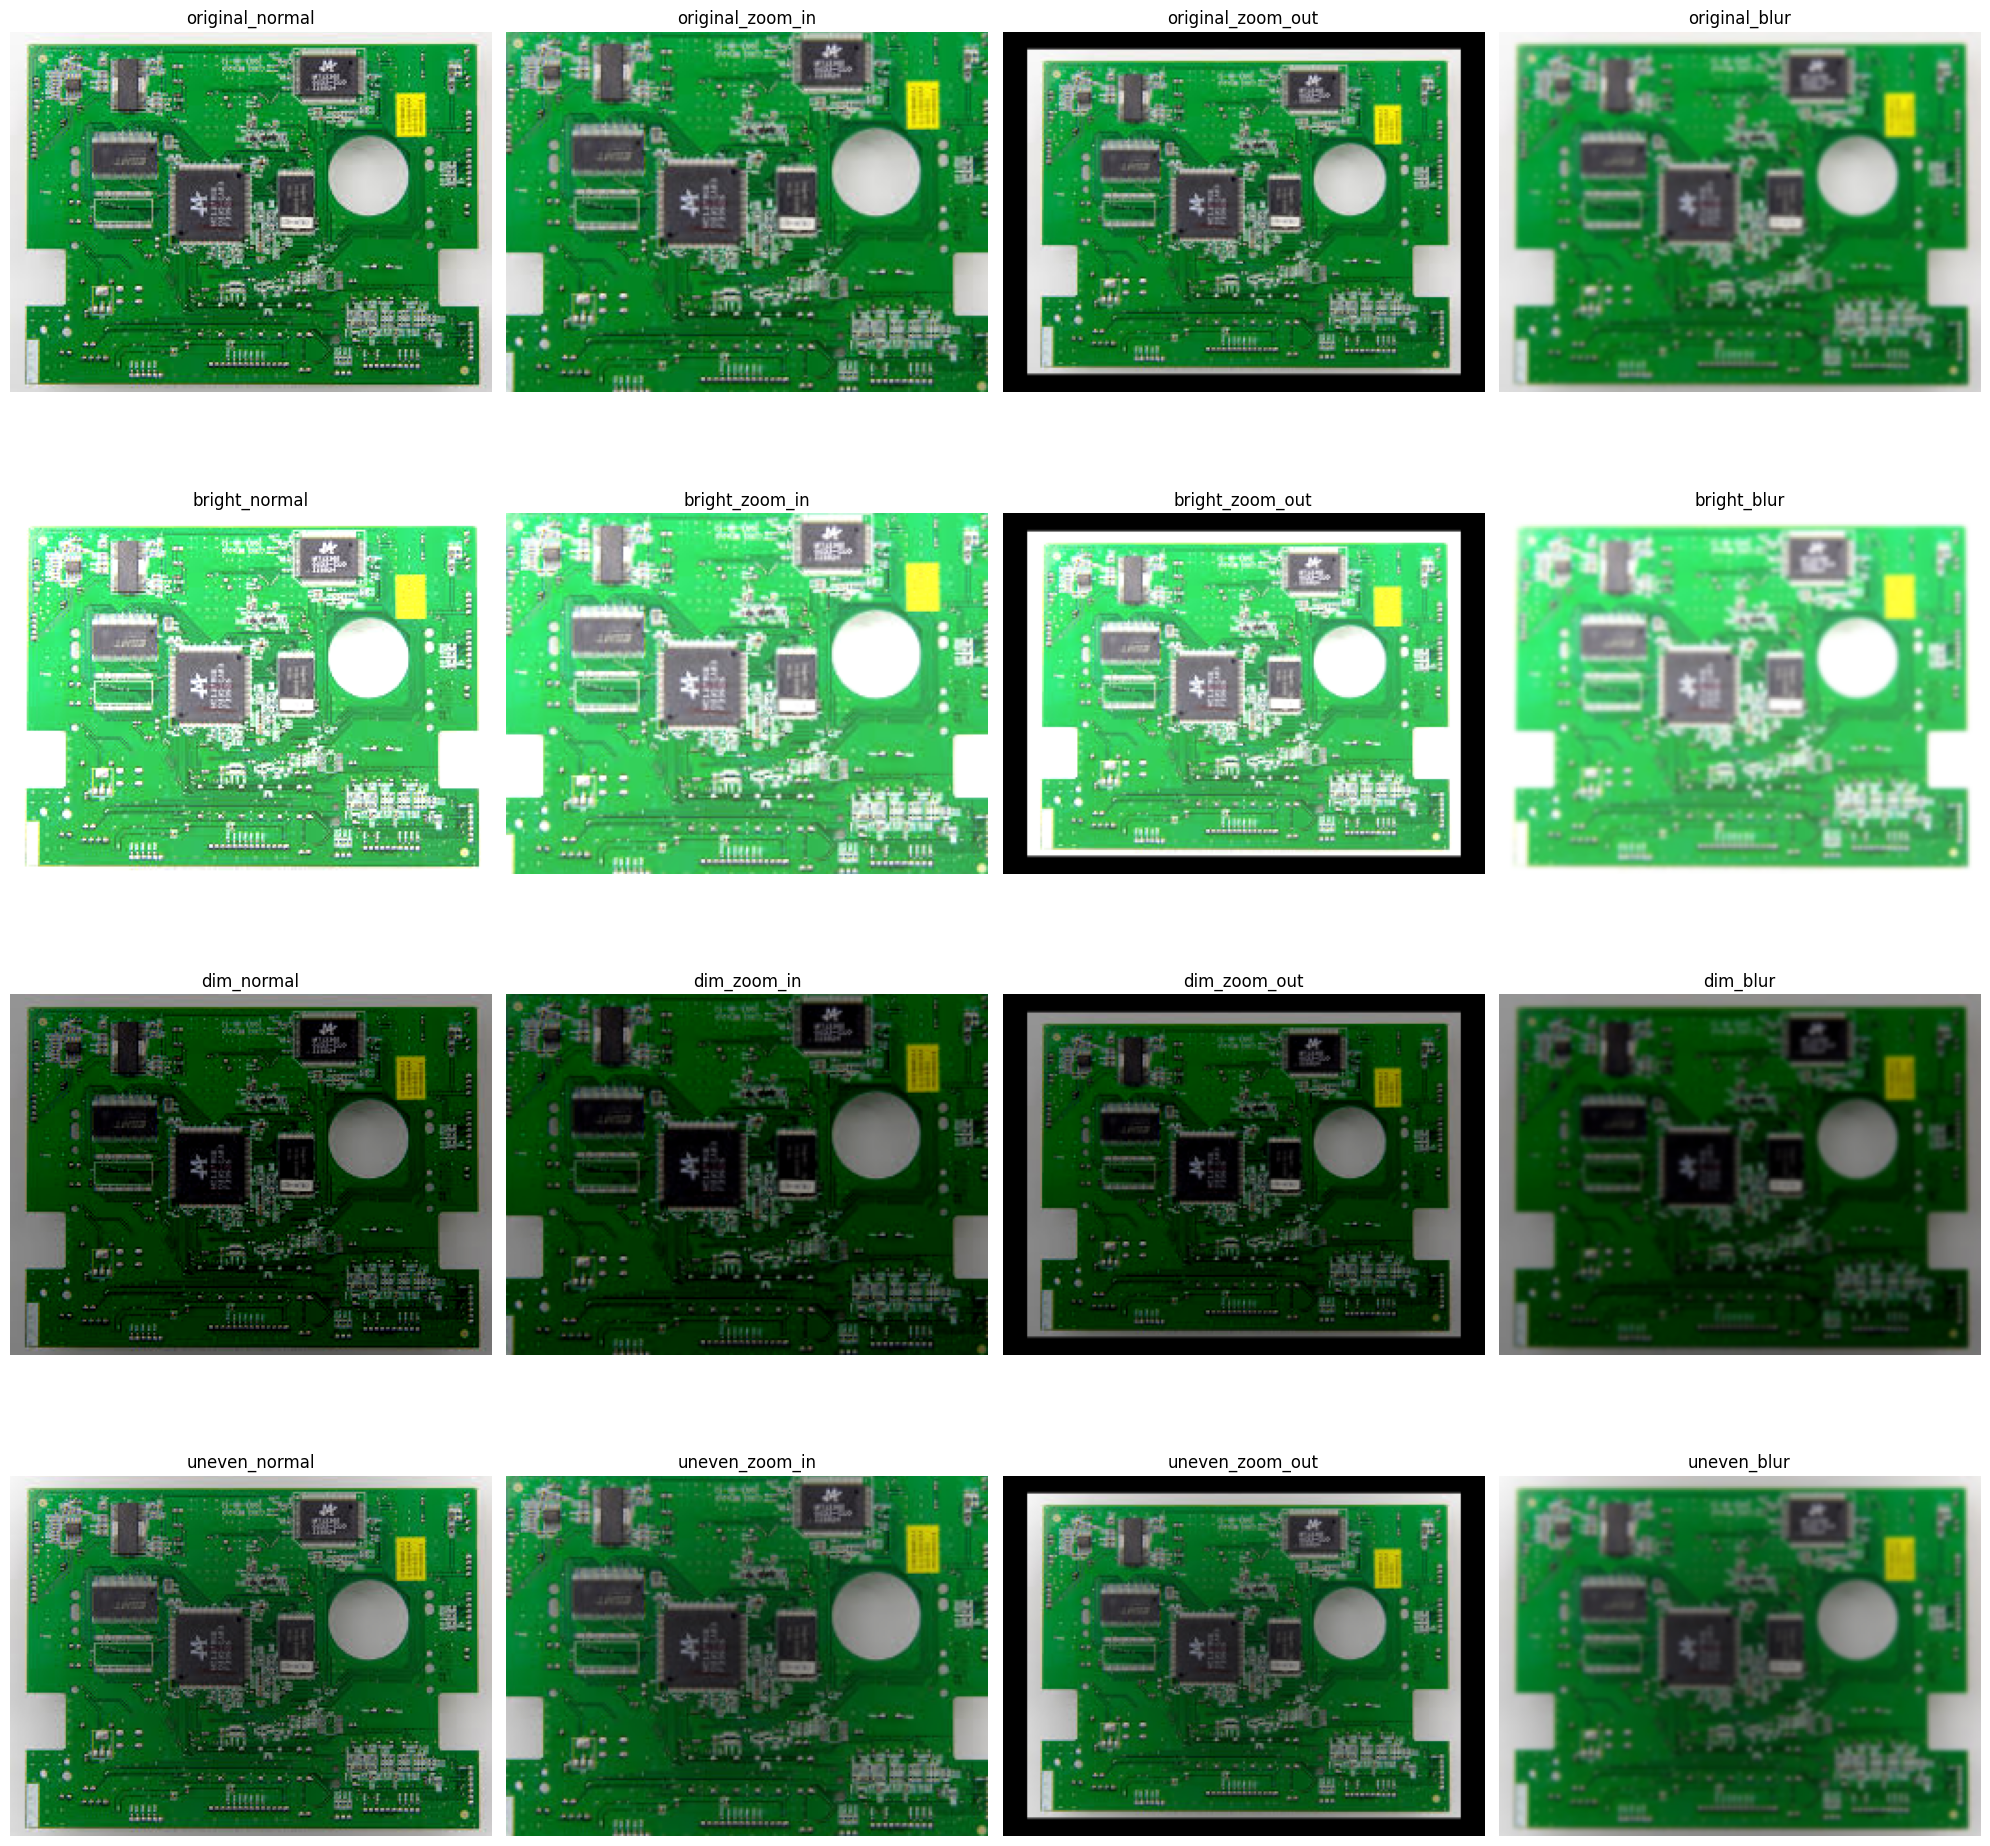

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1️⃣ Load the original image
# -------------------------------
img_path = "/content/images.jpg"  # replace with your image path
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# -------------------------------
# 2️⃣ Define lighting and lens variations
# -------------------------------
lighting_conditions = {
    "original": None,
    "bright": (50, 1.2),
    "dim": (-50, 0.8),
    "uneven": "uneven"
}

lens_conditions = {
    "normal": (1.0, 0),
    "zoom_in": (1.1, 0),
    "zoom_out": (0.9, 0),
    "blur": (1.0, 5)
}

# -------------------------------
# 3️⃣ Helper functions
# -------------------------------
def adjust_lighting(img, brightness=0, contrast=1.0):
    return np.clip(contrast * img + brightness, 0, 255).astype(np.uint8)

def uneven_lighting(img):
    h, w = img.shape[:2]
    Y, X = np.ogrid[:h, :w]
    center_x, center_y = w / 2, h / 2
    distance = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
    max_dist = np.sqrt(center_x**2 + center_y**2)
    mask = 0.5 + 0.5 * (distance / max_dist)
    if len(img.shape) == 3:
        mask = mask[:, :, np.newaxis]
    return np.clip(img * mask, 0, 255).astype(np.uint8)

def simulate_lens(img, focal_scale=1.0, blur=0):
    h, w = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, 0, focal_scale)
    img_scaled = cv2.warpAffine(img, M, (w, h))
    if blur > 0:
        img_scaled = cv2.GaussianBlur(img_scaled, (blur, blur), 0)
    return img_scaled

# -------------------------------
# 4️⃣ Apply variations and store images
# -------------------------------
images = []
titles = []

for light_name, params in lighting_conditions.items():
    if light_name == "original":
        img_lit = img
    elif light_name == "uneven":
        img_lit = uneven_lighting(img)
    else:
        brightness, contrast = params
        img_lit = adjust_lighting(img, brightness, contrast)

    for lens_name, (focal_scale, blur) in lens_conditions.items():
        img_final = simulate_lens(img_lit, focal_scale, blur)
        images.append(img_final)
        titles.append(f"{light_name}_{lens_name}")

# -------------------------------
# 5️⃣ Plot all variations
# -------------------------------
num_images = len(images)
cols = 4
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(5 * cols, 5 * rows))
for i, img_plot in enumerate(images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img_plot)
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()
